<a href="https://colab.research.google.com/github/nazishjahan/Al-Quran/blob/main/visualization_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification using scikit laern**

notebook cover the following conccepts
1. Visualization of Data
2. Preprocessing of Data
3. Model Fitting using Scikit Learn
4. Model Evaluation
5. Result Analysis

In [48]:
import numpy as np # for numerical computation
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
import sklearn # scientific kit for machine learning
import seaborn as sns # data visualisation
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
#Ignore warnings

import warnings
#set the filter to ignore future warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

# categorical color palettes
best for categorical data

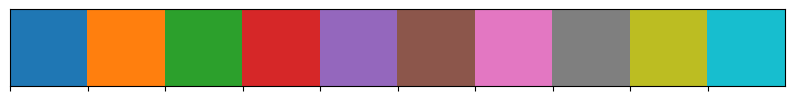

In [49]:
color_palette1 = sns.color_palette()
sns.palplot(color_palette1)
plt.show()

# continuous color palette

sequential plot are suitable for distribution of data from relatively low value to high values within a range

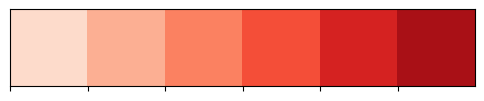

In [50]:
color_palette2 = sns.color_palette()
sns.palplot(sns.color_palette("Reds"))
plt.show()

continuous color palette

# Diverging color palette
can be used for showing range -1 to 1, first color -1 to 0, 2nd color 0 to 1

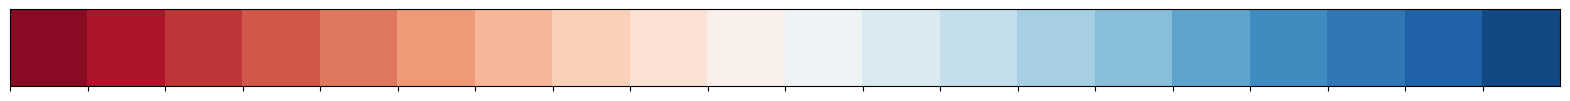

In [51]:
sns.palplot(sns.color_palette("RdBu",20))
plt.show()

Colorblind color palette

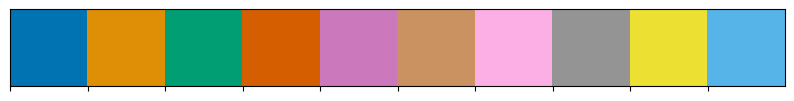

In [52]:
colorblind_palette = sns.color_palette("colorblind")
sns.palplot(colorblind_palette)
plt.show()

read the data

In [53]:
full_data = pd.read_csv("/content/titanic_dataset.csv")

In [54]:
full_data.shape

(891, 12)

In [55]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Distribution plot,
doing this distribution we can understand for our analysis k is data ko mae kis kism k algo k liye use krskti hn

2.1 histplot

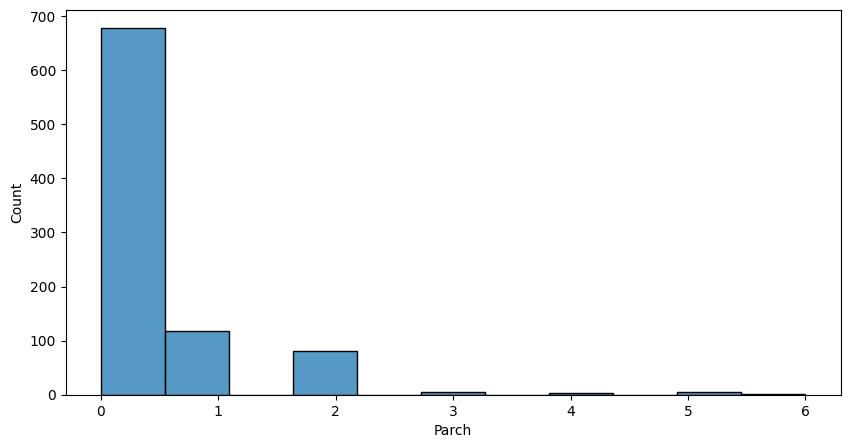

In [56]:
sns.histplot(full_data['Parch'],kde=False)
plt.show()

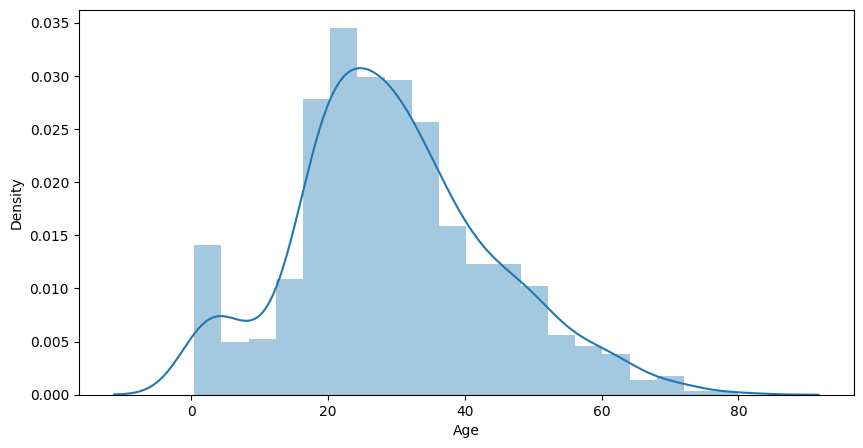

In [57]:
sns.distplot(full_data["Age"], hist="False")
plt.show()

Relational plot

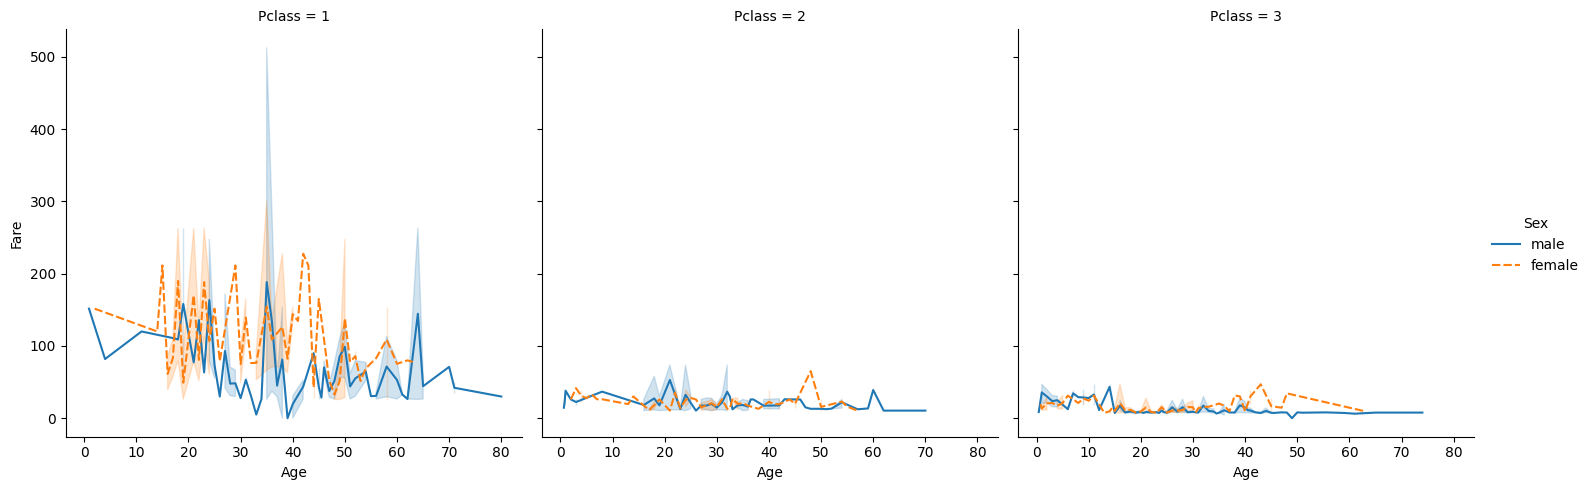

In [58]:
sns.relplot(x= "Age",y="Fare",col="Pclass",hue="Sex",style= "Sex",kind="line",data = full_data)

scatter plot
use to visulize date where observation of data is rep by 2D axis

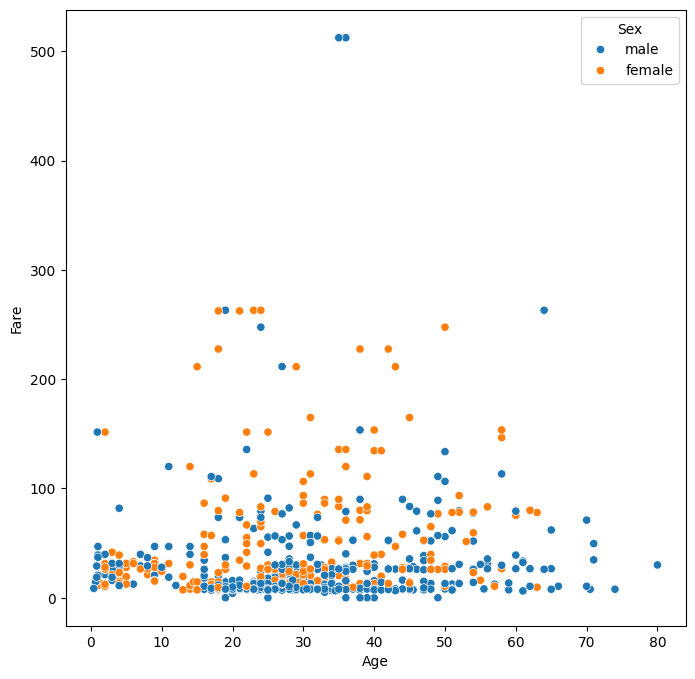

In [59]:
plt.figure(figsize=(8,8))
sns.scatterplot( x="Age", y="Fare", hue="Sex",data=full_data)
plt.show()

lineplot

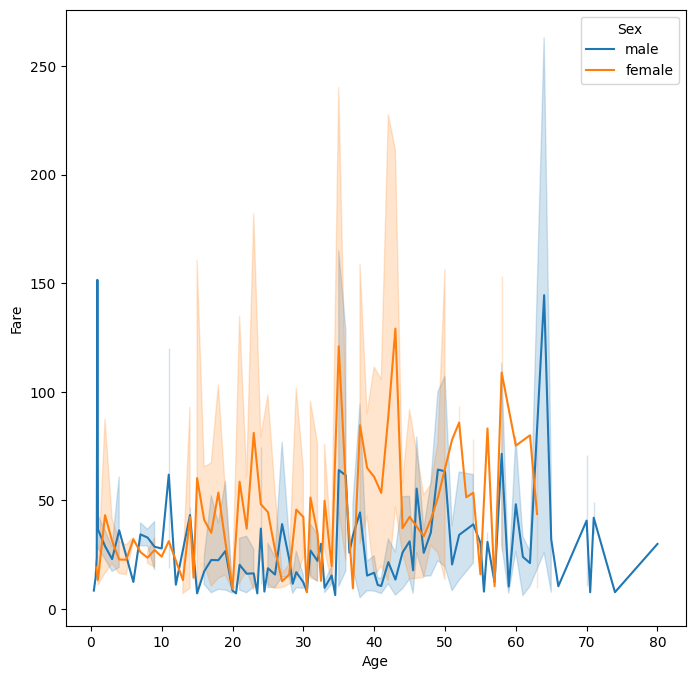

In [60]:
plt.figure(figsize=(8,8))
sns.lineplot ( x="Age", y="Fare", hue="Sex",data=full_data)

plt.show()

Categorical plot
when data of two axis are categorical, we use strip or swarm plot

bar plot
gives relation between categorical and continuos variable. the length of bar represents portion of data in that category, gives estimation of central tendency

Barplot

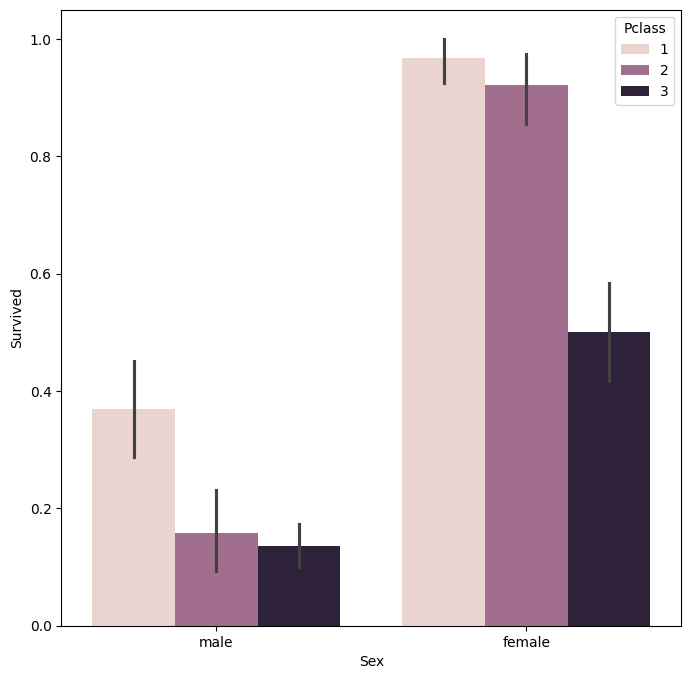

In [61]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex",y="Survived",hue= "Pclass",data=full_data)
plt.show()

strip plot
when one of the variable in categorical form, it shows data in sorted order

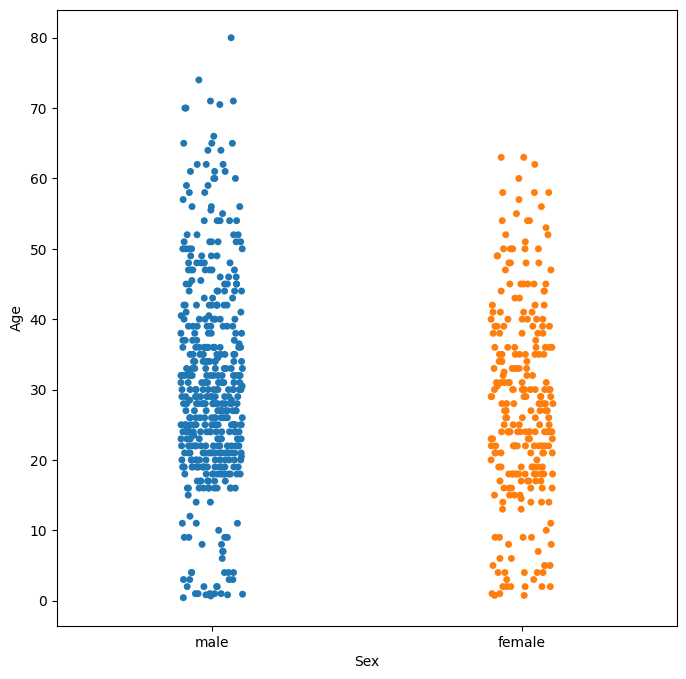

In [62]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Sex",y="Age",hue= "Sex",data=full_data)
plt.show()

swarmplot

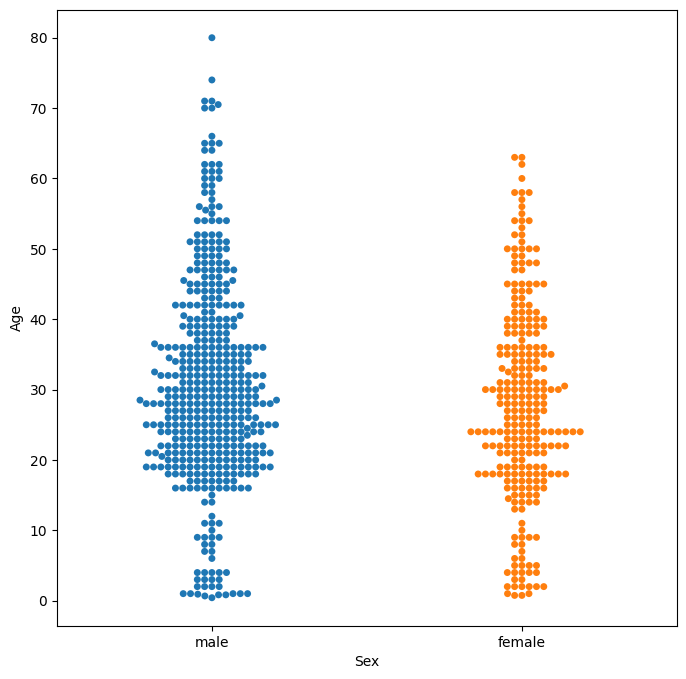

In [63]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="Sex",y="Age",hue= "Sex",data=full_data)
plt.show()

4.4 Box plot
is a way to visulaize distribution of data through quartile

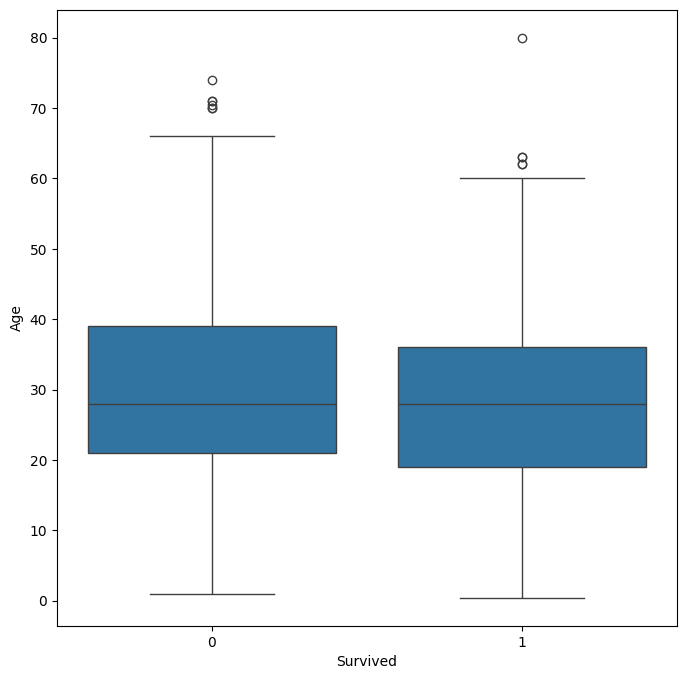

In [64]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived",y="Age",data=full_data)
plt.show()

violin plot is the combination of boxplot and kde, easy to analyse and understand the data

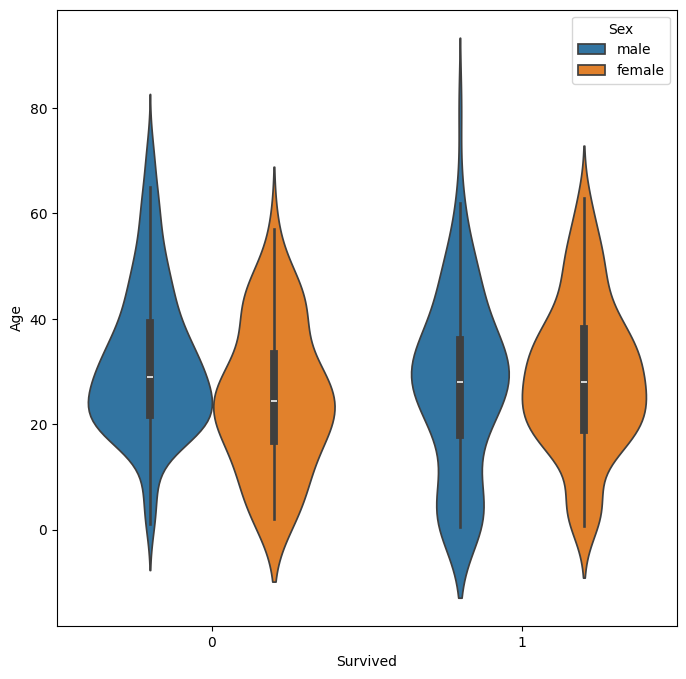

In [65]:
plt.figure(figsize=(8,8))
sns.violinplot(x="Survived",y="Age",hue="Sex",data = full_data)
plt.show()

countplot

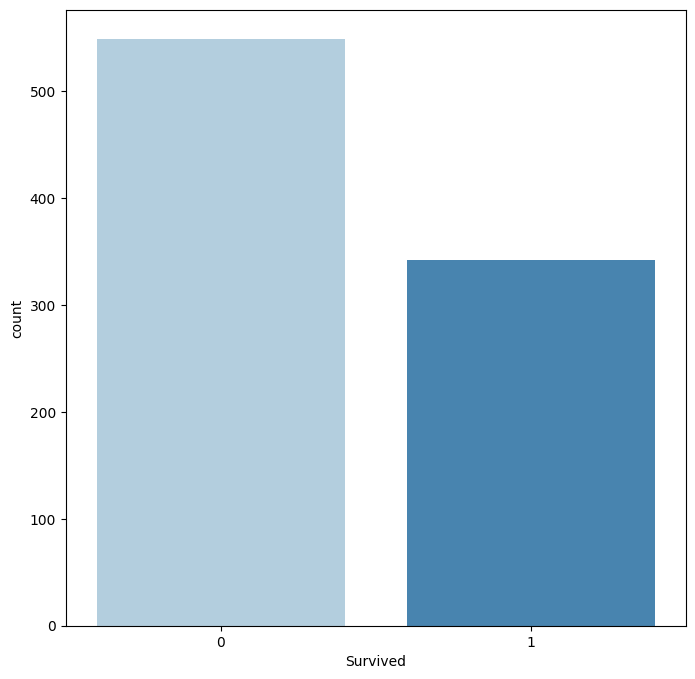

In [66]:
plt.figure(figsize=(8,8))
sns.countplot(x="Survived",data = full_data,palette = "Blues")
plt.show()

pointplot

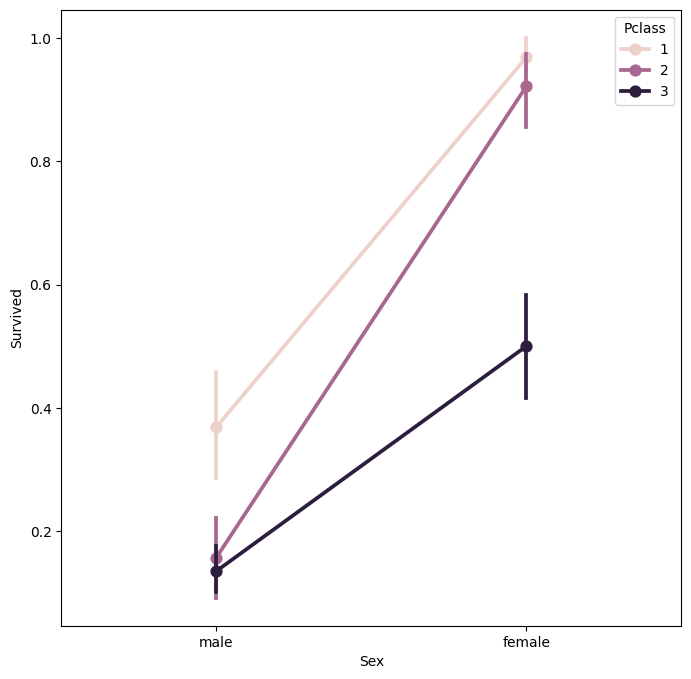

In [67]:
plt.figure(figsize=(8,8))
sns.pointplot(x="Sex",y="Survived",hue="Pclass",data = full_data)
plt.show()

5. Regression plot

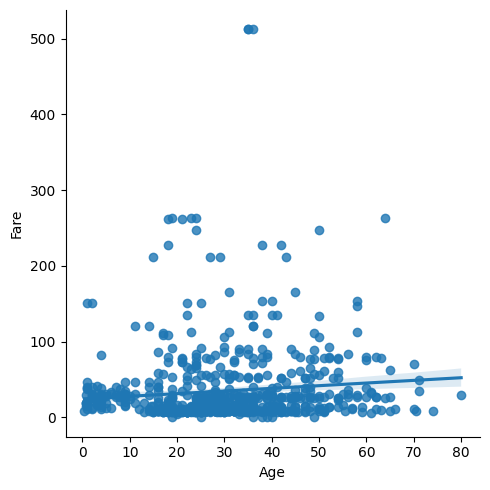

In [68]:
sns.lmplot(x="Age",y="Fare",data=full_data)
plt.show()

# Matrix Plot
Heatmap
gr8 way to do EDA, when you have multiple variables
you can make correlation matrix of data


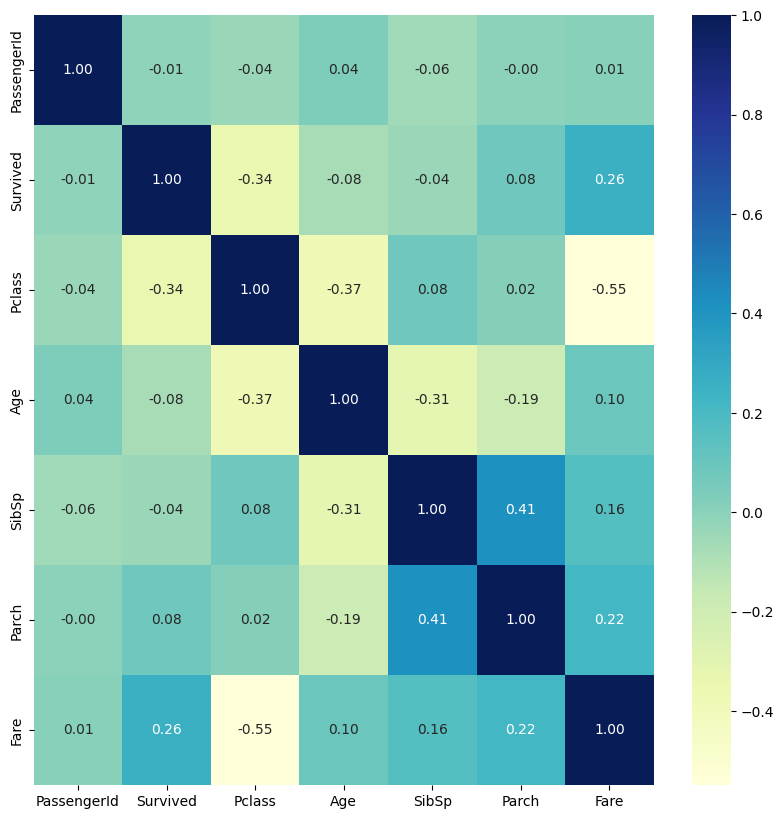

In [69]:
plt.subplots(figsize=(10,10))
# Select only numerical columns for correlation calculation
numerical_data = full_data.select_dtypes(include=np.number)  # This line selects only numerical columns
sns.heatmap(numerical_data.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

FaceGrid

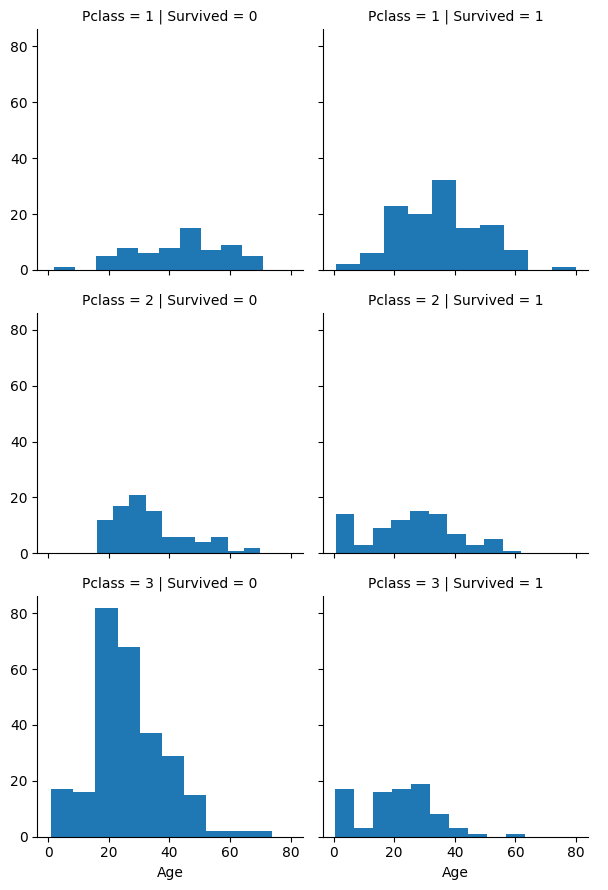

In [70]:
g= sns.FacetGrid(full_data,col="Survived",row="Pclass")
g.map(plt.hist,"Age")
g.add_legend()
plt.show()

# **TRAINING DATA PREPROCESSING**

Load Data


In [71]:
full_data = pd.read_csv("/content/titanic_dataset.csv")

Data Shape

In [72]:
full_data.shape

(891, 12)

In [73]:
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data info

In [74]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data cleaning

Missing Data

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

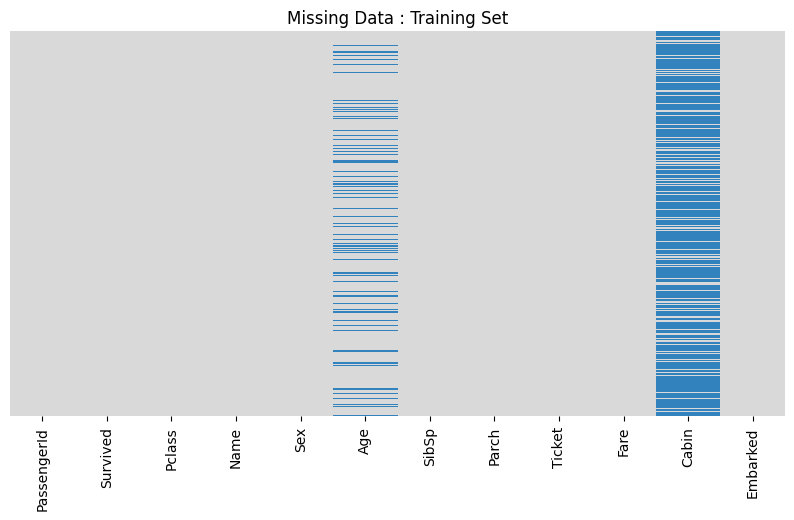

In [76]:
sns.heatmap(full_data.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r').set_title("Missing Data : Training Set")

plt.show()

Text(0.5, 1.0, 'Age by Passenger Class')

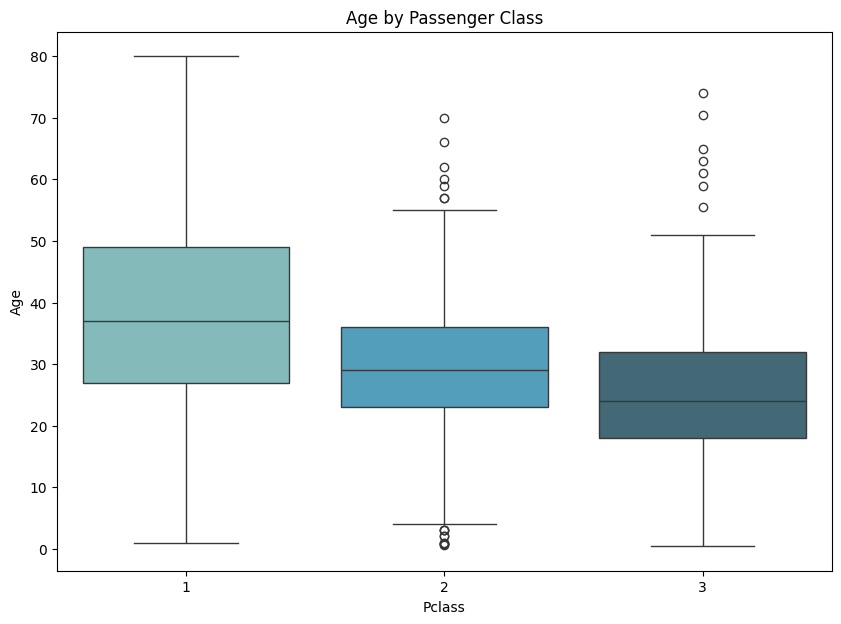

In [77]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age", data = full_data,palette="GnBu_d").set_title("Age by Passenger Class")

data discretization

In [78]:
#Imputation function
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age


In [79]:
#Apply the function to the age column
full_data['Age'] = full_data[['Age','Pclass']].apply(impute_age,axis = 1)

Drop low quality data

In [80]:
# Remove cabin feature
full_data.drop('Cabin',axis=1,inplace=True)

In [81]:
# Remove rows with missing values
full_data.dropna(inplace=True)

In [82]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Data Reduction

In [83]:
#Removing unwanted features
full_data.drop(['Name', 'Ticket'],axis= 1,inplace=True)

In [84]:
# convert objects to category data type
full_data['Sex'] = full_data['Sex'].astype('category')

In [85]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [86]:
full_data['Embarked'] = full_data['Embarked'].astype('category')

In [87]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [88]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
# Remove passengerTd
full_data.drop('PassengerId', inplace = True, axis = 1)

# **Getting Model Ready**

In [90]:
#shape of train data
full_data.shape

(889, 8)

In [91]:
full_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [92]:
#covert categorical to dummy or indicator variables
sex = pd.get_dummies(full_data['Sex'], drop_first = True)
embarked = pd.get_dummies(full_data['Embarked'],drop_first = True)

In [93]:
full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [94]:
full_data = pd.concat([full_data,sex,embarked],axis = 1)

In [95]:
full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [96]:
full_data.drop(['Sex','Embarked'],axis =1, inplace = True)


In [97]:
full_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [98]:
full_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


## **OBjective: apply MACHINE LEARNING algo**

Target Variable Splitting

In [99]:
#split data to be used in model

#create matrix of features
x = full_data.drop('Survived',axis = 1)

#create target variables
y = full_data['Survived'] #feature we want to predict


In [100]:
# x represent feature
x.shape

(889, 8)

In [101]:
#y represents target variable
y.shape

(889,)

In [102]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [115]:
#use x and y variables to split the training data into split and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=101)

In [116]:
x_train.shape

(711, 8)

In [117]:
x_test.shape

(178, 8)

In [106]:
y_train.shape

(711,)

In [107]:
y_train

,Survived
307,1
229,0
82,1
353,0
707,1
...,...
576,1
840,0
338,1
524,0


# **LOGISTIC REGRESSION**

# Model Training

In [118]:
#import model
from sklearn.linear_model import LogisticRegression

In [119]:
#"create an instance of model
log_reg = LogisticRegression()

In [120]:
# pass training data into model
log_reg.fit(x_train,y_train) # learning parameters from training data

LogisticRegression()

##Model Evaluation


In [121]:
print("Logistic Regression")
from sklearn.metrics import accuracy_score

In [122]:
# prediction from model
y_pred_log_reg = log_reg.predict(x_test)

In [124]:
# score it
print("Logistic Regression")
# Accuracy
print("--"*30)


Logistic Regression
------------------------------------------------------------


In [126]:
log_reg_accuracy = round(accuracy_score(y_test,y_pred_log_reg)*100,2)
print("Accuracy",log_reg_accuracy,"%")

Accuracy 82.02 %


# ***2. DECISION TREE ***

Model training


In [127]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
#Create instance of model
Dtree = DecisionTreeClassifier()

# pass training data into model
Dtree.fit(x_train,y_train)

DecisionTreeClassifier()

Model Evaluation

In [131]:
from sklearn.metrics import accuracy_score

In [138]:
# prediciting from model
y_pred_Dtree = Dtree.predict(x_test)
# score it
print("Decision Tree")
print("--"*30)
Dtree_accuracy = round(accuracy_score(y_test,y_pred_Dtree)*100,2)
print("accuracy",Dtree_accuracy,"%")

Decision Tree
------------------------------------------------------------
accuracy 79.21 %


# **RANDOM FOREST CLASSIFIER**

## Model Training

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
#create instance of RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_test,y_test)

RandomForestClassifier()

Model Evaluation

In [145]:
from sklearn.metrics import accuracy_score
y_pred_rfc = rfc.predict(x_test)
#score it
print("RandomForestClassifier")
print("--"*30)

rfc_accuracy = round(accuracy_score(y_test,y_pred_rfc)*100,2)
print("Accuracy:",rfc_accuracy,"%")

RandomForestClassifier
------------------------------------------------------------
Accuracy: 98.31 %


# **GRADIENT BOOSTING**
Model training

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

In [153]:
#create instance of the model

gboostc = GradientBoostingClassifier()

In [154]:
# pass training data into the Model
gboostc.fit(x_train,y_train)
#

GradientBoostingClassifier()

Model Evaluation

In [152]:
from sklearn.metrics import accuracy_score

In [155]:
# Prediction from the model
y_pred_gboostc = gboostc.predict(x_test)

In [160]:
#score it
print("GradientBoostingClassifier")
print("--"*30)

GradientBoostingClassifier
------------------------------------------------------------


In [158]:
gboostc_accuracy = round(accuracy_score(y_test,y_pred_gboostc)*100,2)

In [159]:
print("Accuracy",gboostc_accuracy,"%")

Accuracy 84.27 %


In [165]:
# sample model scores
model_scores = {
    "Logistic Regression":log_reg_accuracy,
    "Decision Tree":Dtree_accuracy,
    "Random Forest":rfc_accuracy,
    "Gradient Boosting":gboostc_accuracy
}
# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(),key=lambda x:x[1],reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model,score) in enumerate(sorted_scores,start=1):
  print(f"{rank}. {model} : {score}")

Model Rankings (Greater Values are better):
1. Random Forest : 98.31
2. Gradient Boosting : 84.27
3. Logistic Regression : 82.02
4. Decision Tree : 79.21
